In [1]:
import pandas as pd
df=pd.DataFrame()

In [2]:
df=pd.read_csv('contractor colony.csv', index_col='date',parse_dates=True)

FileNotFoundError: [Errno 2] No such file or directory: 'contractor colony.csv'

<Axes: xlabel='date'>

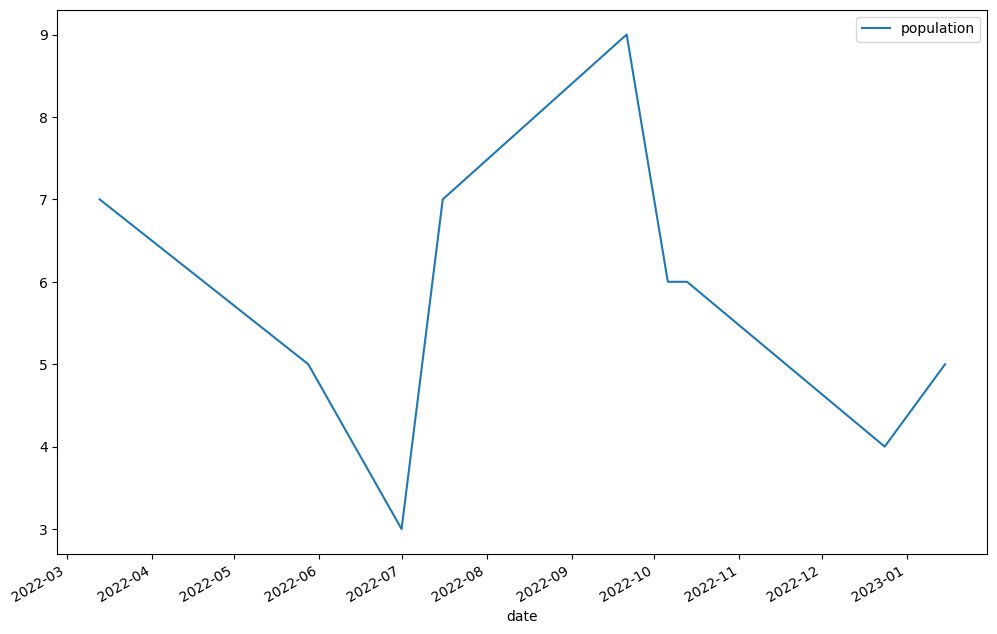

In [91]:
df.columns = ['population']
df.plot(figsize=(12,8))

In [92]:
df['population_LastMonth']=df['population'].shift(+1)
df['population_2Monthsback']=df['population'].shift(+2)
df['population_3Monthsback']=df['population'].shift(+3)
df

,population,population_LastMonth,population_2Monthsback,population_3Monthsback
date,,,,
2022-07-01,3,NaN,NaN,NaN
2022-03-13,7,3.0,NaN,NaN
2022-05-28,5,7.0,3.0,NaN
2022-10-06,6,5.0,7.0,3.0
2022-07-16,7,6.0,5.0,7.0
2022-09-21,9,7.0,6.0,5.0
2022-10-13,6,9.0,7.0,6.0
2022-12-24,4,6.0,9.0,7.0
2023-01-15,5,4.0,6.0,9.0


In [93]:
df=df.dropna()
df

,population,population_LastMonth,population_2Monthsback,population_3Monthsback
date,,,,
2022-10-06,6,5.0,7.0,3.0
2022-07-16,7,6.0,5.0,7.0
2022-09-21,9,7.0,6.0,5.0
2022-10-13,6,9.0,7.0,6.0
2022-12-24,4,6.0,9.0,7.0
2023-01-15,5,4.0,6.0,9.0


In [94]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [95]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)


In [96]:
import numpy as np
x1,x2,x3,y=df['population_LastMonth'],df['population_2Monthsback'],df['population_3Monthsback'],df['population']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[5. 7. 3.]
 [6. 5. 7.]
 [7. 6. 5.]
 [9. 7. 6.]
 [6. 9. 7.]
 [4. 6. 9.]]


In [97]:
X_train,X_test,y_train,y_test=final_x[1:14],final_x[1:14],y[1:16],y[1:16]
print(X_train.shape)
print(y_train.shape)

(5, 3)
(5, 1)


In [98]:
lin_model.fit(X_train,y_train)

LinearRegression()

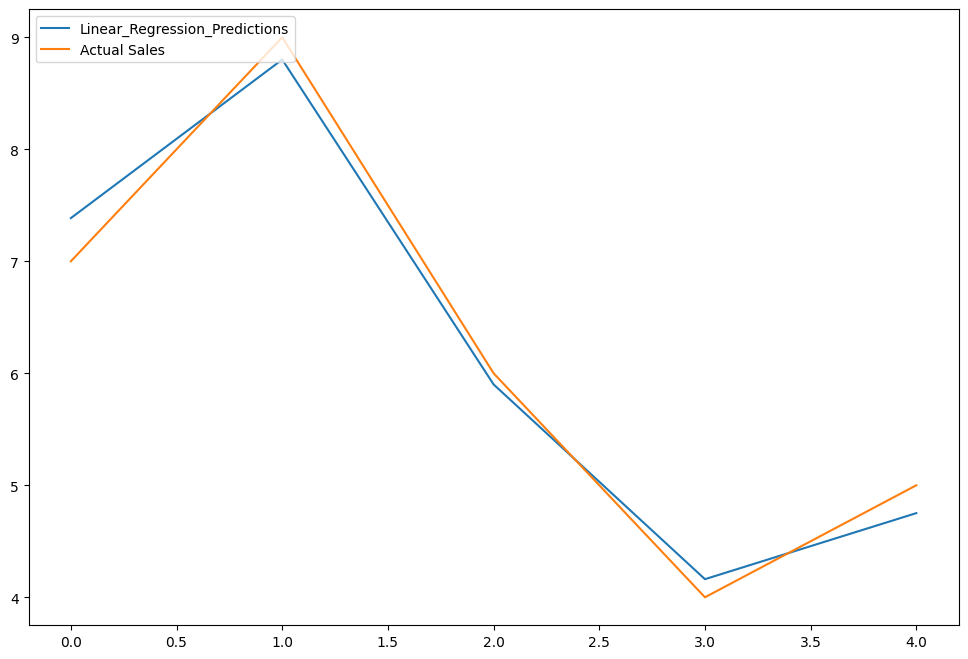

In [99]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [100]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [101]:
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Linear Regression Model is: 0.23914261265861628
